# The Sparks Foundation
## Author: Jahnvi Jain 

# Data Science & Business Analytics

### **TASK-2: Prediction using Unsupervised ML** 
 
We will predict the optimum number of clusters and represent it visually using the given Iris dataset.


In [9]:
# Importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [10]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


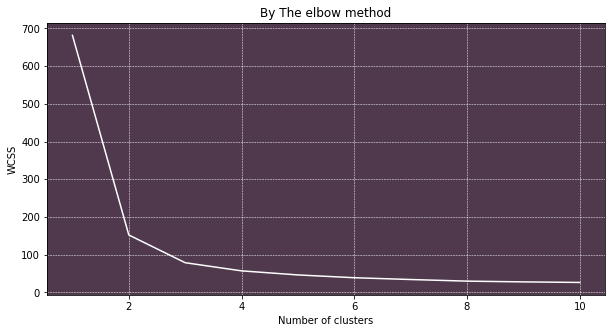

In [11]:
# To Find the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# now let us observe 'The elbow' to get value of number of clusters
ax=plt.axes()
ax.set_facecolor("#50394c")
plt.plot(range(1, 11), wcss,color="white")
plt.title('By The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)
plt.rcParams['figure.figsize'] = [10, 7]
  
plt.show()

## Here from above graph, Number of clusters = 3.

In [12]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

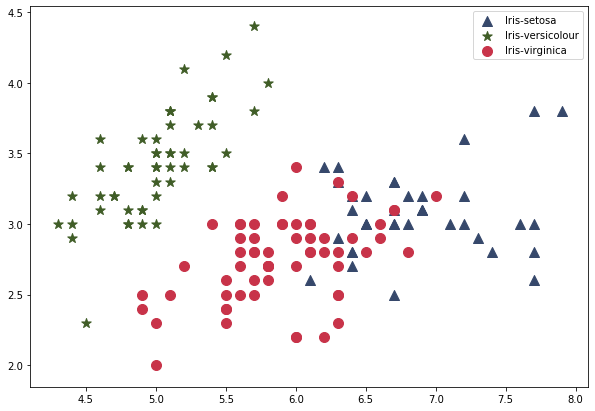

In [13]:
# Visualising the clusters 

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = '#36486b',marker='^', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = '#405d27',marker='*', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = '#c83349', marker='o',label = 'Iris-virginica')
plt.rcParams['figure.figsize'] = [10,5]
plt.legend()